<a href="https://colab.research.google.com/github/RabihSouiden/Ciencias-de-a-computacion/blob/main/Reporte_Delito_Violencia_Intrafamiliar_Policia_Nacional.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importamos pandas-profiling

In [1]:
 pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip 

     \ 25.9 MB 732 kB/s
     |████████████████████████████████| 10.9 MB 6.8 MB/s 
     |████████████████████████████████| 596 kB 35.5 MB/s 
     |████████████████████████████████| 102 kB 7.3 MB/s 
     |████████████████████████████████| 675 kB 64.2 MB/s 
     |████████████████████████████████| 4.7 MB 41.9 MB/s 
     |████████████████████████████████| 63 kB 1.4 MB/s 
     |████████████████████████████████| 812 kB 45.9 MB/s 
     |████████████████████████████████| 38.1 MB 59.3 MB/s 
  Created wheel for pandas-profiling: filename=pandas_profiling-3.1.1-py2.py3-none-any.whl size=261287 sha256=ba00964480bd034f578aed6e4a7ec54028c62a3a3d190246383bd5c1b2f8cc59
  Stored in directory: /tmp/pip-ephem-wheel-cache-95e1mwkg/wheels/cc/d5/09/083fb07c9363a2f45854b0e3a7de7d7c560f07da74b9e9769d
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27098 sha256=452b65c476231f13613de5d40e61b104b7250dd0839fed5918a69d462d107006
  Stored in directory: /root/.cache/pip/wheels/70/e1/52/5b14

# Extraemos los datos

In [2]:
import pandas as pd
from pandas_profiling import ProfileReport

df = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vS4nBmrIhdzDM7sFGw5ljUe4Syb9ggrLbLGPQX1MVTPJjEFZROxGhLZjGMEXAv-tXxL5qoUiRrQtrSI/pub?gid=1198737018&single=true&output=csv')


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
df = df.drop_duplicates()
df['FECHA HECHO'] = pd.to_datetime(df['FECHA HECHO'], format='%d/%m/%Y')
df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,DEPARTAMENTO,MUNICIPIO,CODIGO DANE,ARMAS MEDIOS,FECHA HECHO,GENERO,GRUPO ETARIO,CANTIDAD
0,ATLÁNTICO,BARRANQUILLA (CT),8001000,ARMA BLANCA / CORTOPUNZANTE,2010-01-01,MASCULINO,ADULTOS,1
1,BOYACÁ,DUITAMA,15238000,ARMA BLANCA / CORTOPUNZANTE,2010-01-01,FEMENINO,ADULTOS,1
2,CAQUETÁ,PUERTO RICO,18592000,ARMA BLANCA / CORTOPUNZANTE,2010-01-01,MASCULINO,ADULTOS,1
3,CASANARE,MANÍ,85139000,ARMA BLANCA / CORTOPUNZANTE,2010-01-01,FEMENINO,ADULTOS,1
4,CUNDINAMARCA,BOGOTÁ D.C. (CT),11001000,ARMA BLANCA / CORTOPUNZANTE,2010-01-01,FEMENINO,ADULTOS,1
...,...,...,...,...,...,...,...,...
510513,VICHADA,SANTA ROSALÍA,99624000,SIN EMPLEO DE ARMAS,2021-11-23,MASCULINO,ADULTOS,1
510514,VICHADA,SANTA ROSALÍA,99624000,SIN EMPLEO DE ARMAS,2021-12-10,FEMENINO,ADULTOS,1
510515,VICHADA,SANTA ROSALÍA,99624000,SIN EMPLEO DE ARMAS,2021-12-19,FEMENINO,ADOLESCENTES,1
510516,CUNDINAMARCA,TAUSA,25793000,NO REPORTADO,2021-04-08,FEMENINO,ADULTOS,1


# Generamos el Reporte para explorar los datos

In [4]:
profile = ProfileReport(df)
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# Punto 1
1.	¿Cuáles han sido los departamentos (TOP 3) más afectados a nivel histórico y en el último año?

Realizamos un filtrado sobre el ultimo año 2021
Se realiza un group by por departamento que no utilice indices nuevos, y nos sume la columna cantidad, la cual da la cantidad de delitps cometidos, luego organizamos los valores de cantidad de manera descendente y mostramos los 3 primeros datos

In [5]:
a = df
a['AÑO'] = pd.DatetimeIndex(df['FECHA HECHO']).year
cond1 = a['AÑO']== 2021
a = a[cond1]
a = a.groupby('DEPARTAMENTO', as_index=False)['CANTIDAD'].sum().sort_values(by=['CANTIDAD'], ascending=False).head(3)
a

,DEPARTAMENTO,CANTIDAD
12,CUNDINAMARCA,41742
1,ANTIOQUIA,16503
29,VALLE,9229


# Punto 2
2.	¿Cuál ha sido históricamente el arma o medio más común para cometer el delito?

Realizamos una agrupación de los datos por el arma medio sin generar otro indice y sumando la columna cantidad, así organizamos los valores por este valor y mostramos los 3 primeros datos

In [6]:
 b = df.groupby('ARMAS MEDIOS', as_index=False)['CANTIDAD'].sum().sort_values(by=['CANTIDAD'], ascending=False).head(3)
 b

,ARMAS MEDIOS,CANTIDAD
3,CONTUNDENTES,382801
10,SIN EMPLEO DE ARMAS,265057
8,NO REPORTADO,128303


# Punto 3
3.	¿Cómo es la proporción de géneros y grupos etarios que han estado involucrados en este tipo de delito? ¿Han variado con el paso de los años?

Realizamos la agrupación por dos columnas, Fecha y Genero.
Y realizamos un pivot a esa tabla, el pivot nos permite buscar las variables categoricas de la columna dada (Genero) y sumar los valores de la columna cantidad

In [7]:
#c = df[['GENERO','FECHA HECHO', 'CANTIDAD']]
c  = df.groupby(['FECHA HECHO', 'GENERO'])['CANTIDAD'].sum().reset_index()
#c.set_index('FECHA HECHO', inplace=True)
c = pd.pivot_table(c,index=["FECHA HECHO"], columns= 'GENERO', values='CANTIDAD')
c

GENERO,-,FEMENINO,MASCULINO,NO REPORTA,NO REPORTADO
FECHA HECHO,,,,,
2010-01-01,NaN,190.0,42.0,NaN,NaN
2010-01-02,NaN,52.0,10.0,NaN,NaN
2010-01-03,NaN,65.0,7.0,NaN,NaN
2010-01-04,NaN,61.0,10.0,NaN,NaN
2010-01-05,NaN,48.0,8.0,NaN,NaN
...,...,...,...,...,...
2021-12-27,NaN,145.0,34.0,NaN,NaN
2021-12-28,NaN,109.0,31.0,NaN,NaN
2021-12-29,NaN,81.0,29.0,NaN,NaN


Una vez tenemos organizados los datos procedemos a gráficar para visualizar mejor entre cada uno de los generos su cantidad a lo largo del tiempo

Utilizamos la libreria *matplotlib*

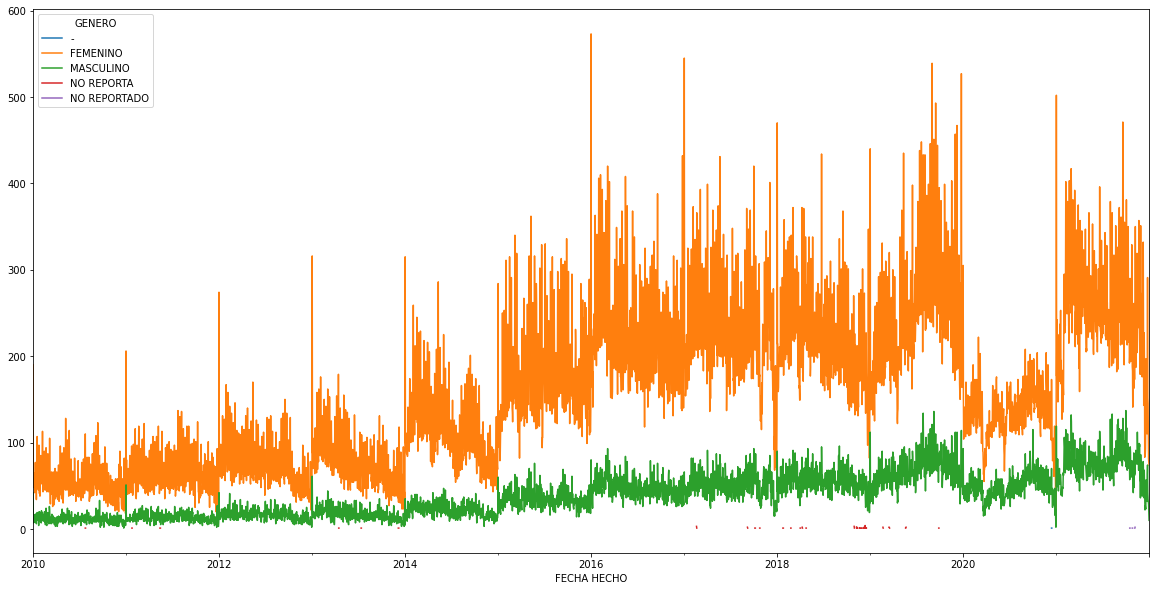

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

c.plot(figsize=(20,10));

# Punto 4
4.	¿Se evidencia alguna tendencia para cometer dicho delito en algún mes particular del año?

Para lograr resolver esta pregunta, primero separamos año y mes de la fecha de hecho.

In [9]:
d = df
#d['FECHA HECHO'] = d['FECHA HECHO'].strftime('%Y-%m-%d')
d['AÑO'] = pd.DatetimeIndex(df['FECHA HECHO']).year
d['MES'] = pd.DatetimeIndex(df['FECHA HECHO']).month
d.tail()

,DEPARTAMENTO,MUNICIPIO,CODIGO DANE,ARMAS MEDIOS,FECHA HECHO,GENERO,GRUPO ETARIO,CANTIDAD,AÑO,MES
510513,VICHADA,SANTA ROSALÍA,99624000,SIN EMPLEO DE ARMAS,2021-11-23,MASCULINO,ADULTOS,1,2021,11
510514,VICHADA,SANTA ROSALÍA,99624000,SIN EMPLEO DE ARMAS,2021-12-10,FEMENINO,ADULTOS,1,2021,12
510515,VICHADA,SANTA ROSALÍA,99624000,SIN EMPLEO DE ARMAS,2021-12-19,FEMENINO,ADOLESCENTES,1,2021,12
510516,CUNDINAMARCA,TAUSA,25793000,NO REPORTADO,2021-04-08,FEMENINO,ADULTOS,1,2021,4
510517,CUNDINAMARCA,ZIPAQUIRÁ,25899000,NO REPORTADO,2021-02-18,FEMENINO,ADULTOS,1,2021,2


Una vez tenemos los datos podemos agruparlos por el mes y sumar la cantidad de delitos de cada uno
Una vez obtenidos los datos en un dataframe procedemos a graficarlos

MES
1     68397
2     72018
3     73483
4     68580
5     75897
6     68909
7     70940
8     73490
9     76300
10    69302
11    63856
12    56281
Name: CANTIDAD, dtype: int64


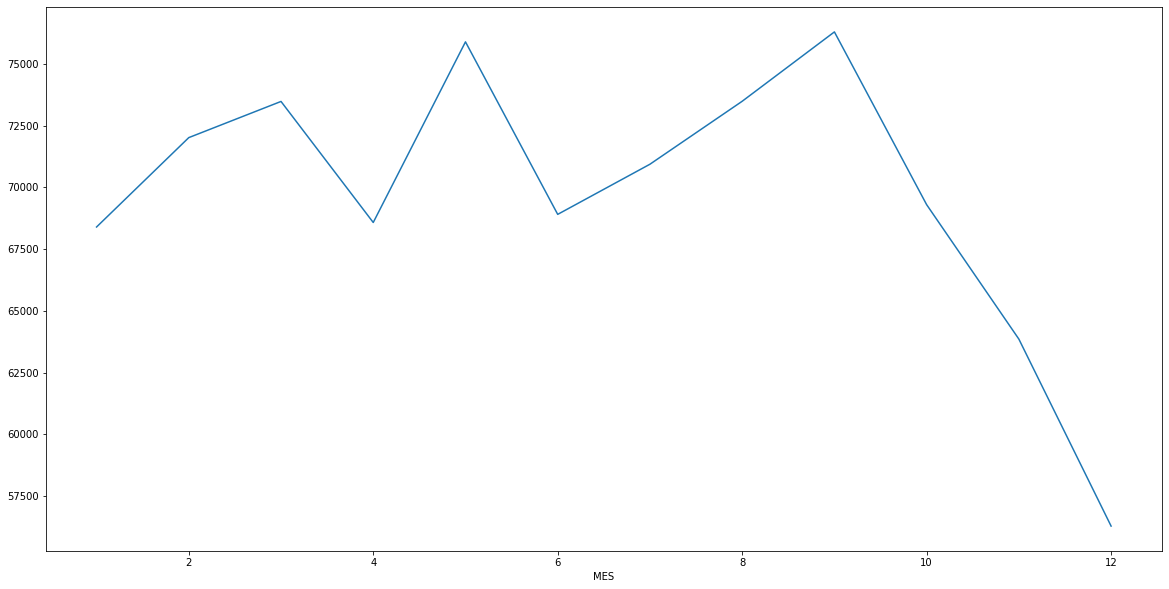

In [10]:
d  = df.groupby(['MES'])['CANTIDAD'].sum()
print(d)
d.plot(figsize=(20,10))

# Punto 5
5.	Para los casos en los que se disponga del detalle del delito o de una descripción, como por ejemplo en delitos sexuales y secuestro, ¿cuáles son los delitos, descripciones o modalidades más comunes?

Para la solución de este punto no se encuentra la columna que referencia el delito